In [1]:
import pandas as pd
import numpy as np
import scipy.io

import matplotlib.pyplot as plt
import seaborn as sns

from upsetplot import generate_counts, UpSet
from matplotlib_venn import venn2, venn2_circles

In [2]:
# Anoxic
mb_an_1 = pd.read_excel('./Membrane/EbN1_Bz_anoxic_MP_G1.xlsx')
mb_an_2= pd.read_excel("./Membrane/EbN1_Bz_anoxic_MP_G2.xlsx")

#Oxic
mb_an_6 = pd.read_excel("./Membrane/EbN1_Bz_oxic_MP_G6.xlsx")
mb_an_8= pd.read_excel("./Membrane/EbN1_Bz_oxic_MP_G8.xlsx")

### Zero peptides

In [3]:
mb_dirty = (mb_an_1, mb_an_2, mb_an_6, mb_an_8)

In [4]:
 total_zero_peptides = 0  # Initialize the total count
    
for i, df in enumerate(mb_dirty, start=1):
    zero_peptides_count = len(df[df['#Peptides'] == 0])
    total_zero_peptides += zero_peptides_count

    print(f"grp {i} has {zero_peptides_count} proteins identified by 0 peptide.")
print()
print(f"Total number of proteins identified by 0 peptide: {total_zero_peptides}")

grp 1 has 6 proteins identified by 0 peptide.
grp 2 has 2 proteins identified by 0 peptide.
grp 3 has 9 proteins identified by 0 peptide.
grp 4 has 7 proteins identified by 0 peptide.

Total number of proteins identified by 0 peptide: 24


In [5]:
o_anox = sum(len(df[df['#Peptides'] == 0]) for df in mb_dirty[:2])
o_ox = sum(len(df[df['#Peptides'] == 0]) for df in mb_dirty[2:])


print(f"Proportion of anoxic proteins identified by 0 peptide: {o_anox / total_zero_peptides:.0%}")
print(f"Proportion of oxic proteins identified by 0 peptide: {o_ox / total_zero_peptides:.0%}")
print()
print(o_anox)
print(o_ox)

Proportion of anoxic proteins identified by 0 peptide: 33%
Proportion of oxic proteins identified by 0 peptide: 67%

8
16


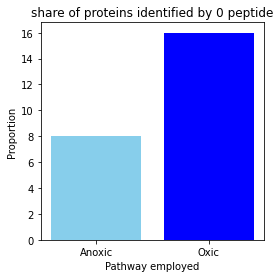

<Figure size 432x288 with 0 Axes>

In [6]:
fig, ax = plt.subplots(figsize = (4,4))
fractions = [o_anox, o_ox]
labels = ['Anoxic', 'Oxic']
col = ['skyblue', 'blue']  # Define colors for the bars

plt.bar(labels, fractions, color=col)# Create a bar plot
plt.xlabel('Pathway employed')# Add labels and a title
plt.ylabel('Proportion')
plt.title('share of proteins identified by 0 peptide')
plt.show();# Display the plot
plt.savefig("share of proteins identified by 0 peptide in mb.pdf");

#### Define function to;
* Remove trailing spaces
* cast all col.names to lower case
* Remove score in parenthesis in scores
* Takes only peptides > o

In [7]:
def oxy_clean_and_filter_dfs(dfs):
    """
    Clean the 'Scores' column in a list of dataframes and filter rows where '#Peptides' is not equal to 0.
    Also, remove trailing spaces from all columns and convert column names to lowercase.

    Args:
        dfs (list of pandas.DataFrame): List of dataframes to process.

    Returns:
        list of pandas.DataFrame: List of processed dataframes.
    """
    processed_dfs = []
    for df in dfs:
        
        # Convert column names to lowercase
        df.columns = df.columns.str.lower()
        
        # Clean the 'Scores' column to remove values within parentheses
        df['scores'] = df['scores'].str.replace(r'\(.*\)', '', regex=True)
        df["scores"] = df["scores"].astype(float)

        # Remove trailing spaces only from columns of type 'object'
        df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

        df = df[df['#peptides'] != 0]   # Remove rows where '#Peptides' is 0

        processed_dfs.append(df)

    return processed_dfs


In [8]:
mb_dirty = (mb_an_1, mb_an_2, mb_an_6, mb_an_8)


mb_clean = oxy_clean_and_filter_dfs(mb_dirty)

In [9]:
# Anoxic
mb_an_1 = mb_clean[0]
mb_an_2 = mb_clean[1]

#oxic
mb_an_6 = mb_clean[2]
mb_an_8 = mb_clean[3]

#### View the first few rows of the df

In [10]:
mb_an_1.head()

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
0,EbN1_C00270,"EbN1_C00270 Conserved hypothetical protein, DU...",90.393257,6.524315,94.9,2,2.214022,1,0.060965
1,EbN1_C01010,"norC nitric oxide reductase (cytochrome c), su...",15.667894,7.808274,97.3,2,20.567376,1,0.051574
2,EbN1_C01020,"norB nitric oxide reductase (cytochrome c), su...",51.977252,9.176876,28.8,1,2.173913,1,0.035554
3,EbN1_C03060,EbN1_C03060 hypothetical protein 333012:334082...,38.018571,4.765166,47.7,1,2.528090,1,0.049794
4,EbN1_C03880,"hbrA benzoyl-CoA reductase, subunit A 424905:4...",32.490308,5.697525,433.4,9,34.323432,1,0.136519


In [11]:
mb_an_2.head()

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
0,EbN1_C00040,pilA1 Major pilin 2251:2685 reverse MW:14410,14.401434,4.566814,68.9,1,9.722222,1,0.064324
1,EbN1_C00270,"EbN1_C00270 Conserved hypothetical protein, DU...",90.393257,6.524315,49.9,1,2.583026,1,0.059555
3,EbN1_C01010,"norC nitric oxide reductase (cytochrome c), su...",15.667894,7.808274,82.4,2,20.567376,1,0.035669
4,EbN1_C02070,"EbN1_C02070 Conserved hypothetical protein, in...",17.421295,5.913673,27.9,1,4.938272,1,0.009633
5,EbN1_C02730,"EbN1_C02730 Conserved hypothetical protein, Om...",16.391765,4.498268,30.7,1,13.043478,1,0.007879


In [12]:
mb_an_6.head()

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
0,EbN1_C00040,pilA1 Major pilin 2251:2685 reverse MW:14410,14.401434,4.566814,274.4,3,22.222222,1,0.055002
1,EbN1_C00270,"EbN1_C00270 Conserved hypothetical protein, DU...",90.393257,6.524315,80.4,1,1.230012,1,0.095587
2,EbN1_C01010,"norC nitric oxide reductase (cytochrome c), su...",15.667894,7.808274,74.5,1,10.638298,1,0.062269
3,EbN1_C04090,EbN1_C04090 hypothetical protein 442431:442805...,13.097647,5.102867,195.6,4,27.419355,1,0.038203
4,EbN1_C04100,bamC outer membrane protein insertion 442912:4...,42.013698,5.165346,56.9,1,3.174603,1,0.049877


In [13]:
mb_an_8.head()

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
0,EbN1_C00040,pilA1 Major pilin 2251:2685 reverse MW:14410,14.401434,4.566814,287.0,3,22.222222,1,0.043198
1,EbN1_C00270,"EbN1_C00270 Conserved hypothetical protein, DU...",90.393257,6.524315,220.6,3,4.059041,1,0.029898
2,EbN1_C00700,aceE pyruvate dehydrogenase (E1) 67518:70193 f...,100.125267,5.741861,57.4,1,1.346801,1,0.011409
3,EbN1_C00710,aceF dihydrolipoyllysine-residue acetyltransfe...,59.968342,4.997646,218.5,3,6.003431,1,0.032303
4,EbN1_C01010,"norC nitric oxide reductase (cytochrome c), su...",15.667894,7.808274,160.6,3,20.567376,1,0.055868


#### Check len of each df and print to screen 

In [14]:
for i, df in enumerate(mb_clean, start=1):
    df_len = len(df)
    print(f"grp {i} contain {df_len} proteins")
    
print()
total_len_anox = sum(len(df) for df in mb_clean[:2])
print("Total protein anoxic:", total_len_anox)

total_len_ox = sum(len(df) for df in mb_clean[2:])
print("Total protein oxic:", total_len_ox)

grp 1 contain 94 proteins
grp 2 contain 82 proteins
grp 3 contain 83 proteins
grp 4 contain 230 proteins

Total protein anoxic: 176
Total protein oxic: 313


### Make total protein bucket

   ### Concatenate 
  #### Anoxic

+ Anoxic dataframes are contatenated row wise (axis = 0) to generate a vertical stacking of all dfs in anoxic. The number of columns remain the same but the rows increases and is re-indexed.
* Next, calculate the count of each protein.. this tells us in how many sample (of 4 replicates) the protein is present.* 
* we select cases where proteins appear in at least 3 replicates
* Repeat process for oxic replicates

In [15]:
all_prot_anox_df = pd.concat(mb_clean[:2], ignore_index=True)

cnt_per_prot = all_prot_anox_df["accession"].value_counts()

bv = cnt_per_prot[cnt_per_prot > 1]         # filter for proteins present in at least 3 replicates
bv_idx = bv.index

print(len(all_prot_anox_df))
print(len(cnt_per_prot))
print(len(bv))
print()
print(bv[:2])

176
115
61

EbN1_C00270    2
EbN1_C21850    2
Name: accession, dtype: int64


In [16]:
bv_filt_df = all_prot_anox_df[all_prot_anox_df['accession'].isin(bv_idx)]  

# Filter all_prot_anox_df based on bv.index

print(len(bv_filt_df))
print()
print(bv_filt_df.nunique())
print()
bv_filt_df.head(2)

122

accession          61
protein            61
mw [kda]           61
pi                 61
scores            119
#peptides          13
sc [%]            111
#alt. proteins      2
rms [da]          122
dtype: int64



,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
0,EbN1_C00270,"EbN1_C00270 Conserved hypothetical protein, DU...",90.393257,6.524315,94.9,2,2.214022,1,0.060965
1,EbN1_C01010,"norC nitric oxide reductase (cytochrome c), su...",15.667894,7.808274,97.3,2,20.567376,1,0.051574


In [17]:
# Group, Aggregate, and Create the Final DataFrame
mb_anox_df = bv_filt_df.groupby('accession').max().reset_index()
mb_anox_df.head()

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
0,EbN1_C00270,"EbN1_C00270 Conserved hypothetical protein, DU...",90.393257,6.524315,94.9,2,2.583026,1,0.060965
1,EbN1_C01010,"norC nitric oxide reductase (cytochrome c), su...",15.667894,7.808274,97.3,2,20.567376,1,0.051574
2,EbN1_C03880,"hbrA benzoyl-CoA reductase, subunit A 424905:4...",32.490308,5.697525,433.4,9,34.323432,1,0.136519
3,EbN1_C03890,"hbrD benzoyl-CoA reductase, subunit D 425856:4...",27.895108,4.760714,302.9,5,19.101124,1,0.051843
4,EbN1_C04090,EbN1_C04090 hypothetical protein 442431:442805...,13.097647,5.102867,259.7,6,36.290323,1,0.040207


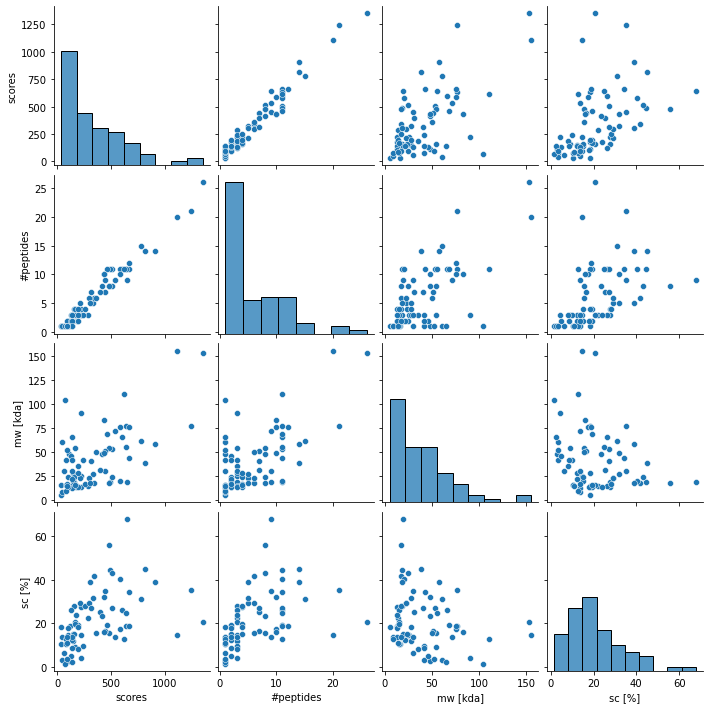

In [93]:
sns.pairplot(data=mb_ox_df, vars=['scores', '#peptides', 'mw [kda]', 'sc [%]'])


### Oxic

In [18]:
all_prot_ox_df = pd.concat(mb_clean[2:], ignore_index=True)

cnt_prot = all_prot_ox_df["accession"].value_counts() # Unique proteins 

bv_ox = cnt_prot[cnt_prot > 1]         # filter for proteins present in 2 replicates
bvox = bv_ox.index

print(len(all_prot_ox_df))
print(len(cnt_prot))
print(len(bv_ox))
print()
print(bv_ox[:2])

313
237
76

EbN1_C00040    2
EbN1_C25140    2
Name: accession, dtype: int64


In [19]:
bv_filt = all_prot_ox_df[all_prot_ox_df['accession'].isin(bvox)]  # Filter all_prot_anox_df based on bv.index

print(len(bv_filt))
print()
print(bv_filt.nunique())
print()
bv_filt.head(2)

152

accession          76
protein            76
mw [kda]           76
pi                 76
scores            149
#peptides          17
sc [%]            138
#alt. proteins      3
rms [da]          152
dtype: int64



,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
0,EbN1_C00040,pilA1 Major pilin 2251:2685 reverse MW:14410,14.401434,4.566814,274.4,3,22.222222,1,0.055002
1,EbN1_C00270,"EbN1_C00270 Conserved hypothetical protein, DU...",90.393257,6.524315,80.4,1,1.230012,1,0.095587


In [20]:
# Group, Aggregate, and Create the Final DataFrame
mb_ox_df = bv_filt.groupby('accession').max().reset_index()
mb_ox_df.head()

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
0,EbN1_C00040,pilA1 Major pilin 2251:2685 reverse MW:14410,14.401434,4.566814,287.0,3,22.222222,1,0.055002
1,EbN1_C00270,"EbN1_C00270 Conserved hypothetical protein, DU...",90.393257,6.524315,220.6,3,4.059041,1,0.095587
2,EbN1_C01010,"norC nitric oxide reductase (cytochrome c), su...",15.667894,7.808274,160.6,3,20.567376,1,0.062269
3,EbN1_C04090,EbN1_C04090 hypothetical protein 442431:442805...,13.097647,5.102867,219.3,4,27.419355,1,0.049625
4,EbN1_C04100,bamC outer membrane protein insertion 442912:4...,42.013698,5.165346,79.6,1,3.174603,1,0.049877


In [21]:
print(len(mb_anox_df)),
print(len(mb_ox_df))

61
76


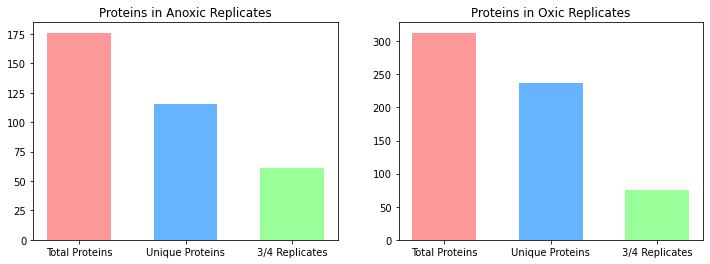

<Figure size 432x288 with 0 Axes>

In [22]:
label_anox = ['Total Proteins', 'Unique Proteins', '3/4 Replicates']
label_ox = ['Total Proteins', 'Unique Proteins', '3/4 Replicates']

sizes_anox = [len(all_prot_anox_df), len(cnt_per_prot), len(bv)]
sizes_ox = [len(all_prot_ox_df), len(cnt_prot), len(bv_ox)]


colors = ['#ff9999', '#66b3ff', '#99ff99']

fig, ax = plt.subplots(1, 2, figsize=(12, 4))          # Create a figure with two subplots


ax[0].bar(label_anox, sizes_anox, color=colors, width = 0.6)                # Create a bar chart for the second subplot (axes[1])
ax[0].set_title("Proteins in Anoxic Replicates")

ax[1].bar(label_ox, sizes_ox, color=colors, width = 0.6)                # Create a bar chart for the second subplot (axes[1])
ax[1].set_title("Proteins in Oxic Replicates")

plt.show()
plt.savefig("Protein_Composition_in_Replicates in mbb.png")



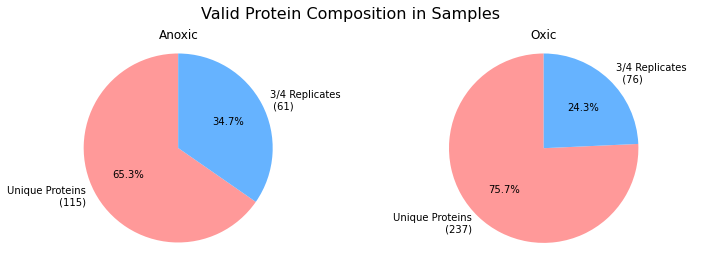

<Figure size 432x288 with 0 Axes>

In [46]:
label_anox = [ 'Unique Proteins\n (115)', '3/4 Replicates\n (61)']
label_ox = ['Unique Proteins\n (237)', '3/4 Replicates\n  (76)']

sizes_anox = [len(cnt_per_prot), len(bv)]
sizes_ox = [len(cnt_prot), len(bv_ox)]


colors = ['#ff9999', '#66b3ff', '#99ff99']

fig, ax = plt.subplots(1, 2, figsize=(12, 4))          # Create a figure with two subplots


ax[0].pie(sizes_anox, labels=label_anox, autopct='%1.1f%%', startangle=90, colors=colors) # Create a pie chart for the first subplot (axes[0])
ax[0].axis('equal')
ax[0].set_title("Anoxic")

ax[1].pie(sizes_ox, labels=label_ox, autopct='%1.1f%%', startangle=90, colors=colors)  # Create a pie chart for the first subplot (axes[0])
ax[1].axis('equal')
ax[1].set_title("Oxic")

plt.suptitle("Valid Protein Composition in Samples", y=0.98, fontsize=16)

# Move the title to the top of the figure
plt.subplots_adjust(top=0.85)

# Save the figure before showing it
plt.show()
plt.savefig("Protein_Composition_in_Samples in mb.png")

### Filter First 10 rows, compare and determine their function

In [24]:
mb_anox_sorted = mb_anox_df.sort_values(by=["scores","#peptides","sc [%]"], ascending=False)

mb_ox_sorted = mb_ox_df.sort_values(by=["scores","#peptides","sc [%]"], ascending=False)


In [25]:
first_10_anox = mb_anox_sorted.iloc[:10]
first_10_anox[:]

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
41,EbN1_C24230,omp32_1 outer membrane porin 2500139:2501218 f...,38.203792,4.571342,1090.1,19,56.267409,2,0.076875
43,EbN1_C25580,"aceA glyoxylate bypass, isocitrate lyase 26529...",47.673757,5.708122,803.8,17,39.491917,1,0.034188
24,EbN1_C21650,tuf1 elongation factor Tu 2243032:2244222 forw...,43.177160,5.319395,590.0,10,31.818182,1,0.399727
11,EbN1_C06380,groEL chaperonin ATPase (60 kDa subunit) 69206...,58.002240,4.920473,585.0,10,24.545455,1,0.064116
57,EbN1_C36360,"narG nitrate reductase, alpha subunit 3721290:...",140.476954,6.485738,580.3,11,11.430855,1,0.100871
22,EbN1_C17090,"atpA F1-ATP synthase, alpha subunit 1794206:17...",55.501991,5.693926,506.5,9,22.070312,1,0.052252
55,EbN1_C36290,nosZ nitrous-oxide reductase 3712825:3714786 r...,71.606452,5.801202,471.7,10,18.223583,1,0.059524
14,EbN1_C07300,"EbN1_C07300 Conserved hypothetical protein, ph...",19.005105,7.196293,466.6,7,60.752688,1,0.052595
29,EbN1_C21750,rpsG 30S ribosomal protein S7 2256782:2257252 ...,17.528351,11.151107,441.8,8,47.435897,1,0.057010
2,EbN1_C03880,"hbrA benzoyl-CoA reductase, subunit A 424905:4...",32.490308,5.697525,433.4,9,34.323432,1,0.136519


In [47]:
first_10_ox = mb_ox_sorted.head(10)
first_10_ox[:]

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
36,EbN1_C21720,"rpoB DNA-directed RNA polymerase, beta subunit...",152.743584,5.274812,1347.7,26,20.406681,1,0.125777
63,EbN1_C30640,"fiu Catecholate siderophore receptor, TonB-dep...",76.378178,5.255412,1244.3,21,35.142857,1,0.064672
37,EbN1_C21730,"rpoC DNA-directed RNA polymerase, beta' subuni...",155.162403,6.632128,1106.2,20,14.478353,1,0.053678
11,EbN1_C06380,groEL chaperonin ATPase (60 kDa subunit) 69206...,58.002240,4.920473,902.3,14,39.090909,1,0.050959
55,EbN1_C24230,omp32_1 outer membrane porin 2500139:2501218 f...,38.203792,4.571342,816.3,14,44.846797,1,0.057613
21,EbN1_C15670,"boxC 2,3-epoxybenzoyl-CoA dihydrolase 1643583:...",61.179248,5.136635,777.2,15,31.059246,1,0.061861
65,EbN1_C33620,pnp polyribonucleotide nucleotidyltransferase ...,75.330396,5.234359,664.0,12,18.597997,1,0.070896
33,EbN1_C21650,tuf1 elongation factor Tu 2243032:2244222 forw...,43.177160,5.319395,660.9,11,34.090909,1,0.057678
13,EbN1_C07300,"EbN1_C07300 Conserved hypothetical protein, ph...",19.005105,7.196293,645.1,9,67.741935,1,0.125310
30,EbN1_C17090,"atpA F1-ATP synthase, alpha subunit 1794206:17...",55.501991,5.693926,637.0,11,24.609375,1,0.054844


### pathway function determination

* we read the file (.xlxs) for lopcalization
* check the functions of the first 10 proteins in both anoxic and oxic respectively
* Analyse output

In [27]:
function = pd.read_excel('EbN1_protein_localization.xlsx')
function.head()

,locustag,Locus,gene,annotation,Localization
0,EbN1_C00010,ebB253,ydaS,"Toxin/antitoxin system, antitoxin, lambda repr...",Unknown
1,EbN1_C00020,ebA2,ebA2,"putative repressor, LexA-like, phage-related",Cytoplasmic
2,EbN1_C00030,ebA5,ebA5,hypothetical protein,Cytoplasmic
3,EbN1_C00040,ebA6,pilA1,Major pilin,Extracellular
4,EbN1_C00050,ebA7,ebA7,"Conserved hypothetical protein, Sel1-like repeat",Cytoplasmic


* make a list of the first_10_anox accession column
* check the elements in the list that matches to locustag column in function df
* view

In [28]:
accessions_to_keep = first_10_anox["accession"].tolist()

# Filter rows in locustag column in function df based on "accession"
anox_func_10 = function[function["locustag"].isin(accessions_to_keep)]
anox_func_10[:]

,locustag,Locus,gene,annotation,Localization
387,EbN1_C03880,ebA742,hbrA,"3-hydroxybenzoate degradation (anaerobic), ben...",Cytoplasmic
637,EbN1_C06380,ebA1185,groEL,"chaperonin ATPase (60 kDa subunit), catalyzes ...",Cytoplasmic
729,EbN1_C07300,ebA1323,ebA1323,"Conserved hypothetical protein, phasin domain-...",Unknown


In [49]:
accessions_to_keep_ox = first_10_ox["accession"].tolist()

# Filter rows in locustag column in function df based on "accession"
ox_func_10 = function[function["locustag"].isin(accessions_to_keep_ox)]
ox_func_10[:]

,locustag,Locus,gene,annotation,Localization
637,EbN1_C06380,ebA1185,groEL,"chaperonin ATPase (60 kDa subunit), catalyzes ...",Cytoplasmic
729,EbN1_C07300,ebA1323,ebA1323,"Conserved hypothetical protein, phasin domain-...",Unknown
1566,EbN1_C15670,ebA2763,boxC,"benzoate degradation (aerobic), 2,3-epoxybenzo...",Cytoplasmic
1708,EbN1_C17090,ebA3004,atpA,"F1-ATP synthase, alpha subunit",Cytoplasmic
2164,EbN1_C21650,ebA3808,tuf1,"translation, elongation, elongation factor Tu ...",Cytoplasmic
2171,EbN1_C21720,ebA3818,rpoB,"Transcription, DNA-directed RNA polymerase, be...",Cytoplasmic
2172,EbN1_C21730,ebA3819,rpoC,"Transcription, DNA-directed RNA polymerase, be...",Cytoplasmic
2422,EbN1_C24230,ebA4244,omp32_1,outer membrane porin,OuterMembrane
3063,EbN1_C30640,ebA5333,fiu,"Catecholate siderophore receptor, TonB-dependent",OuterMembrane
3361,EbN1_C33620,ebA5846,pnp,"RNA degradosome, exoribonuclease, polyribonucl...",Cytoplasmic


### Important proteins common to both conditions.
* This are proteins that are required for both oxic and anoxic benzoate metabolism

In [30]:
cmon_most_important = first_10_anox[first_10_anox["accession"].isin(accessions_to_keep_ox)]
cmon_most_important

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
41,EbN1_C24230,omp32_1 outer membrane porin 2500139:2501218 f...,38.203792,4.571342,1090.1,19,56.267409,2,0.076875
24,EbN1_C21650,tuf1 elongation factor Tu 2243032:2244222 forw...,43.177160,5.319395,590.0,10,31.818182,1,0.399727
11,EbN1_C06380,groEL chaperonin ATPase (60 kDa subunit) 69206...,58.002240,4.920473,585.0,10,24.545455,1,0.064116
22,EbN1_C17090,"atpA F1-ATP synthase, alpha subunit 1794206:17...",55.501991,5.693926,506.5,9,22.070312,1,0.052252
14,EbN1_C07300,"EbN1_C07300 Conserved hypothetical protein, ph...",19.005105,7.196293,466.6,7,60.752688,1,0.052595


### proteins that are unique and most important for anaerobic respiration

In [31]:
cmon_most_important = first_10_anox[~first_10_anox["accession"].isin(accessions_to_keep_ox)]
cmon_most_important

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
43,EbN1_C25580,"aceA glyoxylate bypass, isocitrate lyase 26529...",47.673757,5.708122,803.8,17,39.491917,1,0.034188
57,EbN1_C36360,"narG nitrate reductase, alpha subunit 3721290:...",140.476954,6.485738,580.3,11,11.430855,1,0.100871
55,EbN1_C36290,nosZ nitrous-oxide reductase 3712825:3714786 r...,71.606452,5.801202,471.7,10,18.223583,1,0.059524
29,EbN1_C21750,rpsG 30S ribosomal protein S7 2256782:2257252 ...,17.528351,11.151107,441.8,8,47.435897,1,0.057010
2,EbN1_C03880,"hbrA benzoyl-CoA reductase, subunit A 424905:4...",32.490308,5.697525,433.4,9,34.323432,1,0.136519


### proteins that are unique and most important for aerobic respiration

In [32]:
first_10_ox[~first_10_ox["accession"].isin(accessions_to_keep)]

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
36,EbN1_C21720,"rpoB DNA-directed RNA polymerase, beta subunit...",152.743584,5.274812,1347.7,26,20.406681,1,0.125777
63,EbN1_C30640,"fiu Catecholate siderophore receptor, TonB-dep...",76.378178,5.255412,1244.3,21,35.142857,1,0.064672
37,EbN1_C21730,"rpoC DNA-directed RNA polymerase, beta' subuni...",155.162403,6.632128,1106.2,20,14.478353,1,0.053678
21,EbN1_C15670,"boxC 2,3-epoxybenzoyl-CoA dihydrolase 1643583:...",61.179248,5.136635,777.2,15,31.059246,1,0.061861
65,EbN1_C33620,pnp polyribonucleotide nucleotidyltransferase ...,75.330396,5.234359,664.0,12,18.597997,1,0.070896


In [64]:
poi_dict = {'EbN1_C21720':'rpoB',             
      'EbN1_C30640': 'fiu',
    'EbN1_C21730':'rpoC',
        'EbN1_C15670':'boxC',
    'EbN1_C33620':'pnp',
    'EbN1_C25580':'aceA',
    'EbN1_C36360':'narG',
    'EbN1_C36290':'nosZ',
    'EbN1_C21750':'rpsG',
    'EbN1_C07300':'hbrA',
    'EbN1_C24230':'omp32_1',
    'EbN1_C21650':'tuf1',
    'EbN1_C06380':'groEL',
    'EbN1_C17090':'atpA',
    'EbN1_C07300':'EbN1_C07300_Conserved_hypothetical'}

### Specific and Shared Proteins

####  Shared

In [33]:
# Find common proteins

cmon_prots = mb_anox_df.merge(mb_ox_df, on="accession", how="inner")

print(cmon_prots.shape) 
cmon_prots.head(3)


(42, 17)


,accession,protein_x,mw [kda]_x,pi_x,scores_x,#peptides_x,sc [%]_x,#alt. proteins_x,rms [da]_x,protein_y,mw [kda]_y,pi_y,scores_y,#peptides_y,sc [%]_y,#alt. proteins_y,rms [da]_y
0,EbN1_C00270,"EbN1_C00270 Conserved hypothetical protein, DU...",90.393257,6.524315,94.9,2,2.583026,1,0.060965,"EbN1_C00270 Conserved hypothetical protein, DU...",90.393257,6.524315,220.6,3,4.059041,1,0.095587
1,EbN1_C01010,"norC nitric oxide reductase (cytochrome c), su...",15.667894,7.808274,97.3,2,20.567376,1,0.051574,"norC nitric oxide reductase (cytochrome c), su...",15.667894,7.808274,160.6,3,20.567376,1,0.062269
2,EbN1_C04090,EbN1_C04090 hypothetical protein 442431:442805...,13.097647,5.102867,259.7,6,36.290323,1,0.040207,EbN1_C04090 hypothetical protein 442431:442805...,13.097647,5.102867,219.3,4,27.419355,1,0.049625


### Specific

In [34]:
# Create dataframes for proteins specific to each dataset
anox_specific = mb_anox_df[~mb_anox_df['accession'].isin(cmon_prots['accession'])]
oxic_specific = mb_ox_df[~mb_ox_df['accession'].isin(cmon_prots['accession'])]

In [35]:
print(len(anox_specific)),
print(len(oxic_specific))

19
34


In [36]:
anox_specific.head()

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
2,EbN1_C03880,"hbrA benzoyl-CoA reductase, subunit A 424905:4...",32.490308,5.697525,433.4,9,34.323432,1,0.136519
3,EbN1_C03890,"hbrD benzoyl-CoA reductase, subunit D 425856:4...",27.895108,4.760714,302.9,5,19.101124,1,0.051843
5,EbN1_C04380,glcB malate synthase G 472271:474448 forward M...,78.682047,5.860935,67.2,1,1.241379,1,0.015034
6,EbN1_C04460,"icd2 isocitrate dehydrogenase, monomeric (NADP...",82.394920,5.957257,43.2,1,1.476510,1,0.045702
7,EbN1_C04870,nirS nitrite reductase (NO-forming) 521065:522...,63.928540,7.792005,312.6,5,10.899654,1,0.179314


In [37]:
anox_specific.describe()

,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,56.776223,6.282344,174.747368,3.421053,9.734175,1.105263,0.062453
std,27.623318,1.555177,158.704342,3.005842,8.325610,0.315302,0.040822
min,22.336754,4.402636,33.700000,1.000000,1.241379,1.000000,0.009580
25%,41.467063,5.630455,60.550000,1.000000,2.968789,1.000000,0.038086
50%,49.822561,5.824626,96.100000,2.000000,7.124011,1.000000,0.053379
75%,70.140553,6.183561,307.650000,5.000000,12.572955,1.000000,0.070793
max,140.476954,10.886710,580.300000,11.000000,34.323432,2.000000,0.179314


In [38]:
oxic_specific.head(3)

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
0,EbN1_C00040,pilA1 Major pilin 2251:2685 reverse MW:14410,14.401434,4.566814,287.0,3,22.222222,1,0.055002
4,EbN1_C04100,bamC outer membrane protein insertion 442912:4...,42.013698,5.165346,79.6,1,3.174603,1,0.049877
5,EbN1_C04710,rplT 50S ribosomal protein L20 508412:508771 r...,13.541546,12.015956,116.7,2,18.487395,1,0.013572


In [39]:
oxic_specific.describe()

,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,36.070164,7.479978,242.411765,4.235294,15.889263,1.029412,0.067254
std,25.506090,2.996680,260.950893,4.754958,8.515994,0.171499,0.054816
min,5.212049,4.433994,31.800000,1.000000,1.440329,1.000000,0.012817
25%,14.675690,5.140008,88.625000,1.000000,10.656910,1.000000,0.050705
50%,25.855908,5.821404,136.050000,2.000000,14.854468,1.000000,0.057336
75%,54.083578,10.591558,316.625000,4.500000,18.954633,1.000000,0.065613
max,103.860537,13.201282,1244.300000,21.000000,35.142857,2.000000,0.350628


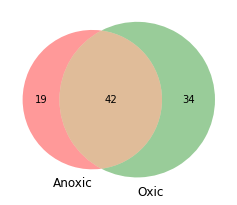

In [40]:
fig, ax = plt.subplots(figsize = (4,4))

venn2(subsets={'10': 19, '01': 34, '11': 42}, set_labels=('Anoxic', 'Oxic'));
ax.set
plt.savefig("venn_sg.png")  # Save the figure as a PNG (you can change the format as needed)


### Proteins of interest and presense/ absence visualization
#### Make a list of total protein and check

In [41]:
protein = ['EbN1_C03880', 'EbN1_C30340', 'EbN1_C30320', 'EbN1_C30310', 'EbN1_C30330',
           'EbN1_C30400', 'EbN1_C30410', 'EbN1_C30420', 'EbN1_C15690', 'EbN1_C15680',
           'EbN1_C15670', 'EbN1_C15650', 'EbN1_C17000', 'EbN1_C36360','EbN1_C04870']


In [42]:
mb_anox_prot = mb_anox_df[mb_anox_df["accession"].isin(protein)]
mb_anox_prot[:]

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
2,EbN1_C03880,"hbrA benzoyl-CoA reductase, subunit A 424905:4...",32.490308,5.697525,433.4,9,34.323432,1,0.136519
7,EbN1_C04870,nirS nitrite reductase (NO-forming) 521065:522...,63.928540,7.792005,312.6,5,10.899654,1,0.179314
19,EbN1_C17000,gcdH glutaryl-CoA dehydrogenase (ETF) 1787289:...,43.335912,6.041761,166.8,4,13.924051,1,0.071821
46,EbN1_C30310,"bcrC benzoyl-CoA reductase, subunit C 3135683:...",43.497624,5.376631,70.9,2,7.124011,2,0.053379
47,EbN1_C30320,"bcrB benzoyl-CoA reductase, subunit B 3136851:...",49.822561,5.811562,90.8,2,4.608295,1,0.060315
48,EbN1_C30400,"dch cyclohexa-1,5-dienecarbonyl-CoA hydratase ...",27.709692,5.463053,110.0,2,12.355212,2,0.069764
49,EbN1_C30420,oah 6-oxocyclohex-1-ene-1-carbonyl-CoA hydrata...,41.667655,5.563384,312.4,6,20.478723,1,0.051492
57,EbN1_C36360,"narG nitrate reductase, alpha subunit 3721290:...",140.476954,6.485738,580.3,11,11.430855,1,0.100871


In [43]:
mb_ox_prot = mb_ox_df[mb_ox_df["accession"].isin(protein)]
mb_ox_prot[:]

,accession,protein,mw [kda],pi,scores,#peptides,sc [%],#alt. proteins,rms [da]
20,EbN1_C15650,"boxD 3,4-dehydroadipyl-CoA semialdehyde dehydr...",54.473268,5.912150,474.9,8,15.428571,1,0.046176
21,EbN1_C15670,"boxC 2,3-epoxybenzoyl-CoA dihydrolase 1643583:...",61.179248,5.136635,777.2,15,31.059246,1,0.061861
22,EbN1_C15680,"boxB benzoyl-CoA 2,3-epoxidase, beta subunit 1...",54.333900,5.552791,162.4,3,8.879493,1,0.038830


In [44]:
prot_name = ['hbrA', 'bcrA', 'bcrB', 'bcrC', 'bcrD',
             'dch', 'had', 'Oah','boxA', 'boxB', 
             'boxC', 'boxD', 'GcdH', 'narG', 'nirS']

protein = ['EbN1_C03880', 'EbN1_C30340', 'EbN1_C30320', 'EbN1_C30310', 'EbN1_C30330',
           'EbN1_C30400', 'EbN1_C30410', 'EbN1_C30420', 'EbN1_C15690', 'EbN1_C15680',
           'EbN1_C15670', 'EbN1_C15650', 'EbN1_C17000', 'EbN1_C36360','EbN1_C04870']

# Create a dictionary
protein_dict = dict(zip(prot_name, protein))


In [66]:
scores_anox = []
scores_ox = []

for prot_name in protein_dict.keys():
    protein_id = protein_dict[prot_name]
    
    if protein_id in mb_anox_df['accession'].values:
        score = mb_anox_df.loc[mb_anox_df['accession'] == protein_id]['scores'].values
        scores_anox.append(score)
    else:
        scores_anox.append(0)  # Append 0 if protein not found in anoxic data
    
    if protein_id in mb_ox_df['accession'].values:
        score_ox = mb_ox_df.loc[mb_ox_df['accession'] == protein_id]['scores'].values
        scores_ox.append(score_ox)
    else:
        scores_ox.append(0)  # Append 0 if protein not found in oxic data

# Convert the lists to numpy arrays for consistency
scores_anox = np.array(scores_anox,  dtype = "float")
scores_ox = np.array(scores_ox, dtype = "float")

print(scores_anox)
print(scores_ox)

[433.4   0.   90.8  70.9   0.  110.    0.  312.4   0.    0.    0.    0.
 166.8 580.3 312.6]
[  0.    0.    0.    0.    0.    0.    0.    0.    0.  162.4 777.2 474.9
   0.    0.    0. ]


/var/folders/qb/h7cvtr2j3xgfb_ls8xftxjs00000gn/T/ipykernel_2142/372242134.py:20: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  scores_anox = np.array(scores_anox,  dtype = "float")
/var/folders/qb/h7cvtr2j3xgfb_ls8xftxjs00000gn/T/ipykernel_2142/372242134.py:21: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  scores_ox = np.array(scores_ox, dtype = "float")


In [67]:
df = pd.DataFrame({'Anox': scores_anox, 'Oxic': scores_ox}, index=protein_dict.keys())
df.head()

,Anox,Oxic
hbrA,433.4,0.0
bcrA,0.0,0.0
bcrB,90.8,0.0
bcrC,70.9,0.0
bcrD,0.0,0.0


In [68]:
# Transpose the DataFrame
transposed_df = df.T
transposed_df

,hbrA,bcrA,bcrB,bcrC,bcrD,dch,had,Oah,boxA,boxB,boxC,boxD,GcdH,narG,nirS
Anox,433.4,0.0,90.8,70.9,0.0,110.0,0.0,312.4,0.0,0.0,0.0,0.0,166.8,580.3,312.6
Oxic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,162.4,777.2,474.9,0.0,0.0,0.0


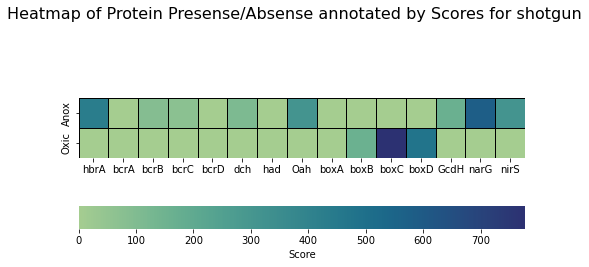

<Figure size 432x288 with 0 Axes>

In [69]:
# Create the custom colormap
#cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(transposed_df, annot=False, fmt=".1f", cmap="crest", cbar_kws={'label': 'Score', 'orientation': 'horizontal'}, linewidth=.5, linecolor= "Black", square=True)
plt.suptitle('Heatmap of Protein Presense/Absense annotated by Scores for shotgun',  y=0.7, fontsize=16)
plt.show()
plt.savefig("heatmap shotgun.pdf")

In [79]:
scores_anox = []
scores_ox = []

for protein_id in poi_dict.keys():
 
    if protein_id in mb_anox_df['accession'].values:
        score = mb_anox_df.loc[mb_anox_df['accession'] == protein_id]['scores'].values
        scores_anox.append(score)
    else:
        scores_anox.append(0)  # Append 0 if protein not found in anoxic data
    
    if protein_id in mb_ox_df['accession'].values:
        score_ox = mb_ox_df.loc[mb_ox_df['accession'] == protein_id]['scores'].values
        scores_ox.append(score_ox)
    else:
        scores_ox.append(0)  # Append 0 if protein not found in oxic data

# Convert the lists to numpy arrays for consistency
scores_anox = np.array(scores_anox, dtype="float")
scores_ox = np.array(scores_ox, dtype="float")

print(scores_anox)
print(scores_ox)


[ 225.6    0.   105.7    0.    70.4  803.8  580.3  471.7  441.8  466.6
 1090.1  590.   585.   506.5]
[1347.7 1244.3 1106.2  777.2  664.   414.5    0.   536.5  476.1  645.1
  816.3  660.9  902.3  637. ]


/var/folders/qb/h7cvtr2j3xgfb_ls8xftxjs00000gn/T/ipykernel_2142/3488203084.py:19: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  scores_anox = np.array(scores_anox, dtype="float")
/var/folders/qb/h7cvtr2j3xgfb_ls8xftxjs00000gn/T/ipykernel_2142/3488203084.py:20: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  scores_ox = np.array(scores_ox, dtype="float")


In [80]:
df1 = pd.DataFrame({'Anox': scores_anox, 'Oxic': scores_ox}, index=poi_dict.values())
df1.head()

,Anox,Oxic
rpoB,225.6,1347.7
fiu,0.0,1244.3
rpoC,105.7,1106.2
boxC,0.0,777.2
pnp,70.4,664.0


In [81]:
# Transpose the DataFrame
trans_df = df1.T
trans_df

,rpoB,fiu,rpoC,boxC,pnp,aceA,narG,nosZ,rpsG,EbN1_C07300_Conserved_hypothetical,omp32_1,tuf1,groEL,atpA
Anox,225.6,0.0,105.7,0.0,70.4,803.8,580.3,471.7,441.8,466.6,1090.1,590.0,585.0,506.5
Oxic,1347.7,1244.3,1106.2,777.2,664.0,414.5,0.0,536.5,476.1,645.1,816.3,660.9,902.3,637.0


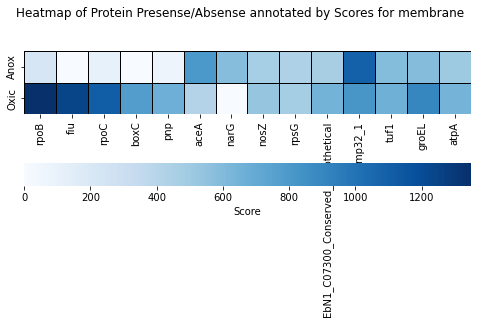

In [91]:
# Create the custom colormap
#cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(trans_df, annot=False, fmt=".1f", cmap='Blues', cbar_kws={'label': 'Score', 'orientation': 'horizontal'}, linewidth=.5, linecolor= "Black", square=True)
plt.suptitle('Heatmap of Protein Presense/Absense annotated by Scores for membrane',  y=0.6, fontsize=12)
plt.show()